<a href="https://colab.research.google.com/github/pascalghanimi/Ski-Classification-AI/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1286]:
# Ordner "data" als ZIP komprimieren
!zip -r data.zip data/
from google.colab import files
files.download("data.zip")

  adding: data/ (stored 0%)
  adding: data/PHALP_EKatja_PD_features.pkl (deflated 82%)
  adding: data/PHALP_GKatja_PGK_features.pkl (deflated 82%)
  adding: data/PHALP_DKatja_PGK_features.pkl (deflated 82%)
  adding: data/PHALP_DKatja_PDL2_features.pkl (deflated 82%)
  adding: data/PHALP_BKatja_PDL2_features.pkl (deflated 82%)
  adding: data/PHALP_HKatja_PGK_features.pkl (deflated 82%)
  adding: data/PHALP_HKatja_PD_features.pkl (deflated 82%)
  adding: data/PHALP_FKatja_PGL2_features.pkl (deflated 82%)
  adding: data/PHALP_BKatja_PS_features.pkl (deflated 83%)
  adding: data/PHALP_AKatja_PGK_features.pkl (deflated 85%)
  adding: data/PHALP_DKatja_PGL2_features.pkl (deflated 82%)
  adding: data/PHALP_GKatja_PD_features.pkl (deflated 82%)
  adding: data/PHALP_CKatja_PDK_features.pkl (deflated 82%)
  adding: data/PHALP_CKatja_PD_features.pkl (deflated 82%)
  adding: data/PHALP_EKatja_CL_features.pkl (deflated 81%)
  adding: data/PHALP_FKatja_CL_features.pkl (deflated 81%)
  adding: data/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1268]:
import joblib
import numpy as np

pkl_name = "PHALP_HKatja_PS"

# erlaubte Fahrstile: CL, EKK, PD, PDK, PDL, PDL2, PGK, PGL, PGL2, PS, CL2, PS2
fahrstil = "PS"

schwungbereiche = [
    (0, 3, 1),
    (4, 96, 2),
    (98, 198, 1),
    (199, 275, 2),
]




# Lade die Daten
result = joblib.load(f"/content/{pkl_name}.pkl")

In [1269]:
from typing_extensions import dataclass_transform
# Hier wird der COM berechnet

HAND_FOREARM_SCALE_FACTOR = 0.75

# Definiere die Segmente und relative Faktoren als Dictionary
segments = {
    "head_and_neck": {"points": (43, 40), "factor": 0.567}, # 43 ist Head, 40 ist Thorax
    "torso": {"points": (40, 8), "factor": 0.562}, # 40 ist Thorax, 8 ist Mid Hip
    "upper_arm_right": {"points": (2, 3), "factor": 0.564},  # 2 ist rechte Schulter, 3 ist rechter Ellbogen
    "upper_arm_left": {"points": (5, 6), "factor": 0.564},  # 5 ist linke Schulter, 6 ist linker Ellbogen
    "lower_arm_right": {"points": (3, 4), "factor": 0.57}, # 3 ist rechter Ellbogen, 4 ist rechtes Handgelenk
    "lower_arm_left": {"points": (6, 7), "factor": 0.57}, # 6 ist linker Ellbogen, 7 ist linkes Handgelenk
    "hand_right": {"factor": 0.468}, # Faktor ist hier 46.8, weil wir bei der Berechnung später bei der Wrist anfangen und die Länge des Ellbogens hinzuaddieren, hier also in die andere Richtung gehen als sonst
    "hand_left": {"factor": 0.468},
    "thigh_right": {"points": (9, 10), "factor": 0.567},  # 9 ist rechte Hüfte, 10 ist rechtes Knie
    "thigh_left": {"points": (12, 13), "factor": 0.567}, # 12 ist linke Hüfte, 13 ist linkes Knie
    "calf_right": {"points": (10, 11), "factor": 0.567}, # 10 ist rechtes Knie, 11 ist rechtes Ankle
    "calf_left": {"points": (13, 14), "factor": 0.567}, # 13 ist linkes Knie, 14 ist linkes Ankle
    "foot_right": {"points": (11, 22), "factor": 0.5}, # 11 ist rechtes Ankle, 22 ist großer Zeh rechts
    "foot_left": {"points": (14, 19), "factor": 0.5} # 14 ist linkes Ankle, 19 ist großer Zeh links
}


com_of_segments = {}

for i, frame in enumerate(list(result.keys())):
  com_of_segment = {}
  for segment, data in segments.items():
    if (segment == "hand_right"):
      com_position = np.array(result[frame]["3d_joints"][0][4]) + (
      (np.array(result[frame]["3d_joints"][0][4]) - np.array(result[frame]["3d_joints"][0][3]))
      * HAND_FOREARM_SCALE_FACTOR
      ) * data["factor"]
      com_of_segment[segment] = com_position
    elif segment == "hand_left":
      com_position = np.array(result[frame]["3d_joints"][0][7]) + (
      (np.array(result[frame]["3d_joints"][0][7]) - np.array(result[frame]["3d_joints"][0][6]))
      * HAND_FOREARM_SCALE_FACTOR
      ) * data["factor"]
      com_of_segment[segment] = com_position
    else:
      point_higher, point_lower = data["points"]
      com_position = np.array(result[frame]["3d_joints"][0][point_lower]) + ((np.array(result[frame]["3d_joints"][0][point_higher]) - np.array(result[frame]["3d_joints"][0][point_lower])) * data["factor"])
      com_of_segment[segment] = com_position


  com_of_segments[i] = com_of_segment


for i in range(3):
  print(com_of_segments[i]["head_and_neck"], "Head and Neck COM")

for i in range(3):
    print(com_of_segments[i]["lower_arm_right"], "Lower Arm Right COM")

for i in range(3):
  print(com_of_segments[i]["hand_right"], "Hand Right COM")



[ 0.0562553  -0.84214693 -0.08808561] Head and Neck COM
[ 0.06173174 -0.84545845 -0.07902732] Head and Neck COM
[ 0.07011976 -0.84255934 -0.06801312] Head and Neck COM
[-0.31081203 -0.40737566 -0.13369036] Lower Arm Right COM
[-0.29850677 -0.41499406 -0.11590192] Lower Arm Right COM
[-0.28798547 -0.40804684 -0.11165935] Lower Arm Right COM
[-0.3590292  -0.29254925 -0.33233476] Hand Right COM
[-0.33087102 -0.29950228 -0.3174843 ] Hand Right COM
[-0.31183016 -0.27930033 -0.30778065] Hand Right COM


In [1270]:
relative_masses = {
    "head_and_neck": 0.082,  # Beispiel aus Tabelle Hall
    "torso": 0.4684,
    "upper_arm_right": 0.0325,
    "upper_arm_left": 0.0325,
    "lower_arm_right": 0.0196,  # Unterarmgewicht, basierend auf Literaturwerten
    "lower_arm_left": 0.0196,
    "hand_right": 0.0061,  # Handgewicht, basierend auf Literaturwerten
    "hand_left": 0.0061,
    "thigh_right": 0.105,
    "thigh_left": 0.105,
    "calf_right": 0.0475,
    "calf_left": 0.0475,
    "foot_right": 0.0143,
    "foot_left": 0.0143
}


# Liste, die die COMs für alle Frames speichert
COM_xyz_values = {}

for frame in com_of_segments:
  COM_xyz = np.sum([
    np.array(com_of_segments[frame][segment]) * relative_masses[segment]
    for segment in relative_masses.keys()
  ], axis=0)
  COM_xyz_values[frame] = COM_xyz

print(COM_xyz_values)


{0: array([ 0.00884021, -0.33009797, -0.05082066], dtype=float32), 1: array([ 0.01170067, -0.33211872, -0.04911489], dtype=float32), 2: array([ 0.01769783, -0.33644685, -0.06057657], dtype=float32), 3: array([ 0.01727112, -0.3386324 , -0.05690473], dtype=float32), 4: array([ 0.02279836, -0.33526006, -0.06685399], dtype=float32), 5: array([ 0.02376661, -0.33510923, -0.0723831 ], dtype=float32), 6: array([ 0.02633899, -0.3320029 , -0.07551597], dtype=float32), 7: array([ 0.0287317 , -0.3324456 , -0.07208401], dtype=float32), 8: array([ 0.0303981 , -0.33046007, -0.07406748], dtype=float32), 9: array([ 0.03093437, -0.33141094, -0.06782319], dtype=float32), 10: array([ 0.03387123, -0.33410132, -0.07002057], dtype=float32), 11: array([ 0.03451093, -0.3331989 , -0.06620163], dtype=float32), 12: array([ 0.03380875, -0.33684438, -0.05634788], dtype=float32), 13: array([ 0.03263501, -0.32883605, -0.06116513], dtype=float32), 14: array([ 0.03318858, -0.32868642, -0.06321464], dtype=float32), 15: 

In [1271]:
r_ankle = {}
l_ankle = {}
center_ankle = {}

for i, frame in enumerate(list(result.keys())):
  r_ankle[i] = result[frame]["3d_joints"][0][11]
  l_ankle[i] = result[frame]["3d_joints"][0][14]
  center_ankle[i] = (result[frame]["3d_joints"][0][11] + result[frame]["3d_joints"][0][14]) / 2

print(len(r_ankle))
print(len(COM_xyz_values))


276
276


In [1272]:
COM_to_ground = {}

for i in COM_xyz_values:
  distance = np.linalg.norm(COM_xyz_values[i] - center_ankle[i])
  COM_to_ground[i] = distance

print(COM_to_ground)

{0: np.float32(0.7581649), 1: np.float32(0.75216), 2: np.float32(0.77810186), 3: np.float32(0.7764344), 4: np.float32(0.7992735), 5: np.float32(0.78916377), 6: np.float32(0.79874957), 7: np.float32(0.79617196), 8: np.float32(0.8006673), 9: np.float32(0.8025426), 10: np.float32(0.79038477), 11: np.float32(0.79299533), 12: np.float32(0.7585489), 13: np.float32(0.79520637), 14: np.float32(0.8044584), 15: np.float32(0.80390793), 16: np.float32(0.80679303), 17: np.float32(0.7992105), 18: np.float32(0.8043176), 19: np.float32(0.79716355), 20: np.float32(0.78987265), 21: np.float32(0.7836218), 22: np.float32(0.7823428), 23: np.float32(0.7932026), 24: np.float32(0.80147743), 25: np.float32(0.807606), 26: np.float32(0.81541413), 27: np.float32(0.81011474), 28: np.float32(0.8439559), 29: np.float32(0.8497753), 30: np.float32(0.85602355), 31: np.float32(0.8601885), 32: np.float32(0.86352795), 33: np.float32(0.8700836), 34: np.float32(0.88082534), 35: np.float32(0.8825121), 36: np.float32(0.885413

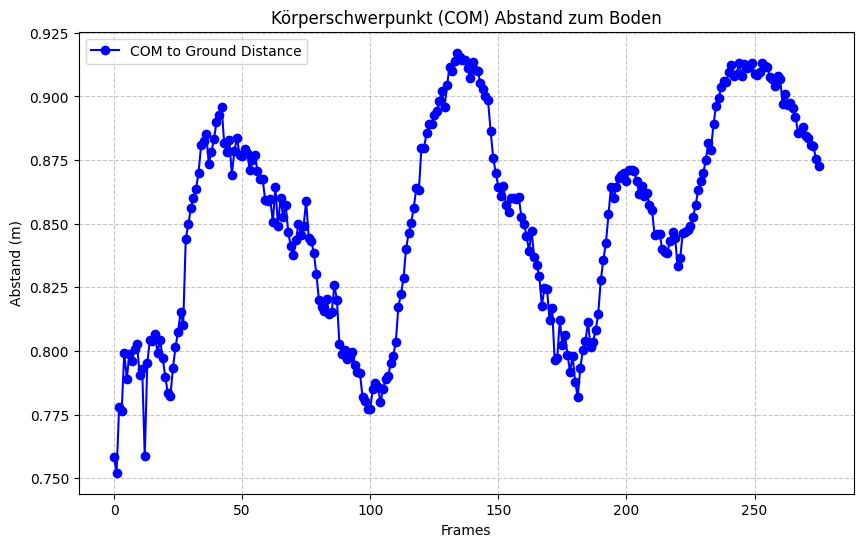

In [1273]:
import matplotlib.pyplot as plt

# COM_to_ground-Daten, die bereits berechnet
frames = list(COM_to_ground.keys())
distances = list(COM_to_ground.values())

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(frames, distances, marker='o', linestyle='-', color='b', label="COM to Ground Distance")
plt.title("Körperschwerpunkt (COM) Abstand zum Boden")
plt.xlabel("Frames")
plt.ylabel("Abstand (m)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


In [1274]:
# Hier wird das Feature Kniewinkel für jeden Frame berechnet
r_hip_num = 9
r_knee_num = 10
r_ankle_num = 11
r_shoulder_num = 2
r_ellbow_num = 3
l_hip_num = 12
l_knee_num = 13
l_ankle_num = 14
l_shoulder_num = 5
l_ellbow_num = 6


knee_angles_right = {}
knee_angles_left = {}

for i, frame in enumerate(list(result.keys())):
  vector_right_hip_knee = result[frame]['3d_joints'][0][r_knee_num] - result[frame]['3d_joints'][0][r_hip_num]
  vector_left_hip_knee = result[frame]['3d_joints'][0][l_knee_num] - result[frame]['3d_joints'][0][l_hip_num]
  vector_right_knee_ankle =  result[frame]['3d_joints'][0][r_knee_num] - result[frame]['3d_joints'][0][r_ankle_num] # hier Änderung, nur wenn beide Winkel zum Knie zeigen, berechnet man wirklich den Innenwinkel, ansonsten den Außenwinkel
  vector_left_knee_ankle =  result[frame]['3d_joints'][0][l_knee_num] - result[frame]['3d_joints'][0][l_ankle_num]

  right_leg_dot_product = np.dot(vector_right_hip_knee, vector_right_knee_ankle)
  left_leg_dot_product = np.dot(vector_left_hip_knee, vector_left_knee_ankle)

  right_hip_knee_length = np.linalg.norm(vector_right_hip_knee)
  left_hip_knee_length = np.linalg.norm(vector_left_hip_knee)
  right_knee_ankle_length = np.linalg.norm(vector_right_knee_ankle)
  left_knee_ankle_length = np.linalg.norm(vector_left_knee_ankle)


  knee_angle_right = np.degrees(np.arccos(right_leg_dot_product / (right_hip_knee_length * right_knee_ankle_length)))
  knee_angle_left = np.degrees(np.arccos(left_leg_dot_product / (left_hip_knee_length * left_knee_ankle_length)))

  knee_angles_right[i] = knee_angle_right
  knee_angles_left[i] = knee_angle_left


for i in range(5):
  print(knee_angles_right)


{0: np.float32(99.435), 1: np.float32(91.83501), 2: np.float32(100.94437), 3: np.float32(98.05684), 4: np.float32(111.34235), 5: np.float32(110.4582), 6: np.float32(114.19261), 7: np.float32(113.27748), 8: np.float32(115.11473), 9: np.float32(115.72606), 10: np.float32(112.65832), 11: np.float32(113.46448), 12: np.float32(96.366974), 13: np.float32(109.20251), 14: np.float32(113.57179), 15: np.float32(113.6908), 16: np.float32(115.414825), 17: np.float32(111.959564), 18: np.float32(115.8082), 19: np.float32(113.216545), 20: np.float32(112.32368), 21: np.float32(108.62825), 22: np.float32(106.84578), 23: np.float32(115.55553), 24: np.float32(117.8463), 25: np.float32(118.71166), 26: np.float32(119.56461), 27: np.float32(107.46769), 28: np.float32(125.554794), 29: np.float32(128.46228), 30: np.float32(128.56139), 31: np.float32(132.4104), 32: np.float32(133.40265), 33: np.float32(135.54654), 34: np.float32(136.08821), 35: np.float32(136.63971), 36: np.float32(138.0666), 37: np.float32(13

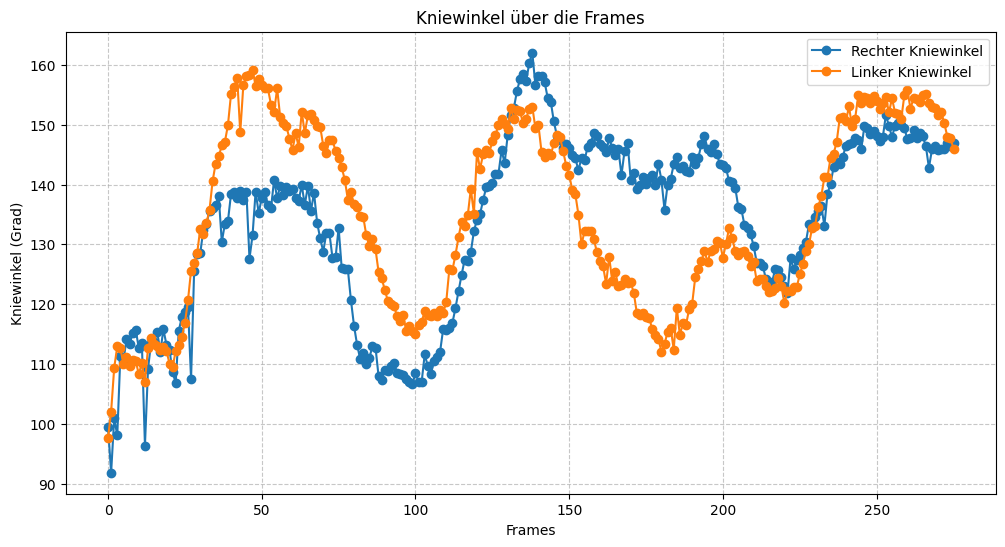

In [1275]:
import matplotlib.pyplot as plt

# Frames extrahieren
frames = list(knee_angles_right.keys())

# Kniewinkel extrahieren
right_knee_angles = [knee_angles_right[frame] for frame in frames]
left_knee_angles = [knee_angles_left[frame] for frame in frames]


# Plot erstellen
plt.figure(figsize=(12, 6))

# Kniewinkel (rechts) plotten
plt.plot(frames, right_knee_angles, label="Rechter Kniewinkel", linestyle='-', marker='o')

# Kniewinkel (links) plotten
plt.plot(frames, left_knee_angles, label="Linker Kniewinkel", linestyle='-', marker='o')

# Plot-Details
plt.title("Kniewinkel über die Frames")
plt.xlabel("Frames")
plt.ylabel("Kniewinkel (Grad)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


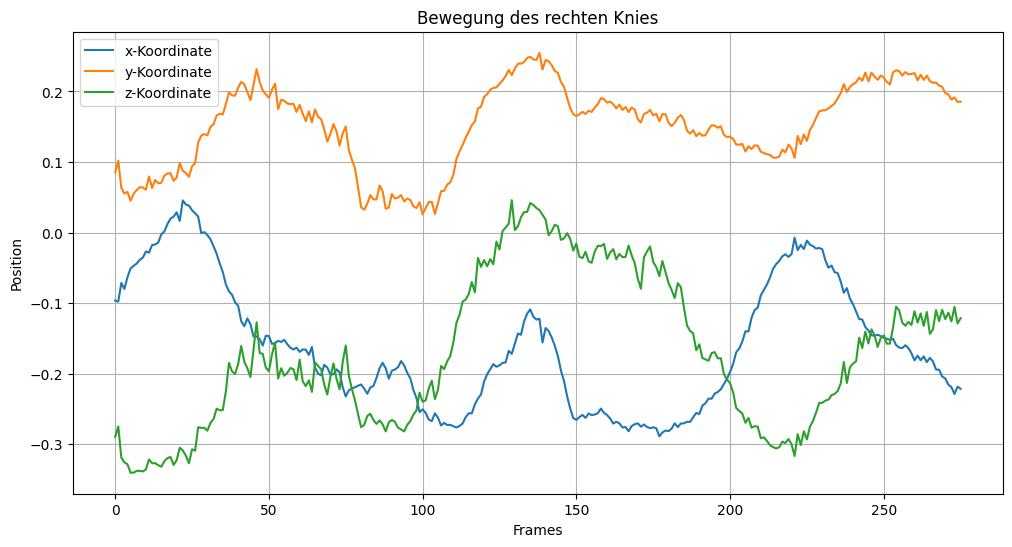

In [1276]:
#exemplarische Darstellung des rechten Knies

import matplotlib.pyplot as plt

x_coords = [result[frame]['3d_joints'][0][r_knee_num][0] for frame in result.keys()]
y_coords = [result[frame]['3d_joints'][0][r_knee_num][1] for frame in result.keys()]
z_coords = [result[frame]['3d_joints'][0][r_knee_num][2] for frame in result.keys()]

plt.figure(figsize=(12, 6))
plt.plot(x_coords, label="x-Koordinate")
plt.plot(y_coords, label="y-Koordinate")
plt.plot(z_coords, label="z-Koordinate")
plt.title("Bewegung des rechten Knies")
plt.xlabel("Frames")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()

# x-Achse: Die Bewegung des Knies entlang der x-Achse ist logisch, da der Fahrer nach rechts und links fährt. Die starke Veränderung in den Werten passt zu einer Schwungbewegung.
# y-Achse: Diese sollte stabil bleiben, da das Knie (wie du sagst) nicht groß um die y-Achse rotiert. Die minimalen Änderungen könnten durch Tracking-Rauschen entstehen.
# z-Achse: Leichte Schwankungen in z sind plausibel, da das Knie aufgrund von Hoch- und Tiefbewegungen während des Fahrens minimal variiert.

In [1277]:
import numpy as np

def calculate_joint_angles(result):
    axis_vectors = {
        "x": np.array([1, 0, 0]),
        "y": np.array([0, 1, 0]),
        "z": np.array([0, 0, -1])
    }
    joint_angles = {}

    for i, frame in enumerate(result.keys()):
        joint_angles[i] = {}

        joints = result[frame]['3d_joints'][0]
        vectors = {
            "shoulder_to_ellbow_right": joints[r_ellbow_num] - joints[r_shoulder_num],
            "shoulder_to_ellbow_left": joints[l_ellbow_num] - joints[l_shoulder_num],
            "hip_to_knee_right": joints[r_knee_num] - joints[r_hip_num],
            "hip_to_knee_left": joints[l_knee_num] - joints[l_hip_num],
            "knee_to_ankle_right": joints[r_ankle_num] - joints[r_knee_num],
            "knee_to_ankle_left": joints[l_ankle_num] - joints[l_knee_num]
        }

        for axis_name, axis_vector in axis_vectors.items():
            joint_angles[i][axis_name] = {}

            for joint_name, joint_vector in vectors.items():
                angle = np.degrees(np.arccos(
                    np.dot(joint_vector, axis_vector) / (np.linalg.norm(joint_vector) * np.linalg.norm(axis_vector))
                ))
                joint_angles[i][axis_name][f"{axis_name}_{joint_name}_axis_angle"] = angle

    return joint_angles

# Berechnung der Winkel
joint_angles = calculate_joint_angles(result)

# Beispiel-Ausgabe für Frame 0
print(joint_angles[0])


{'x': {'x_shoulder_to_ellbow_right_axis_angle': np.float64(123.44233075828333), 'x_shoulder_to_ellbow_left_axis_angle': np.float64(60.19909488140118), 'x_hip_to_knee_right_axis_angle': np.float64(93.80131709121635), 'x_hip_to_knee_left_axis_angle': np.float64(80.03596880056293), 'x_knee_to_ankle_right_axis_angle': np.float64(110.90856978163825), 'x_knee_to_ankle_left_axis_angle': np.float64(113.06428147896112)}, 'y': {'y_shoulder_to_ellbow_right_axis_angle': np.float64(33.70395705264966), 'y_shoulder_to_ellbow_left_axis_angle': np.float64(41.499415364073805), 'y_hip_to_knee_right_axis_angle': np.float64(50.296182824697425), 'y_hip_to_knee_left_axis_angle': np.float64(41.07151274720913), 'y_knee_to_ankle_right_axis_angle': np.float64(36.92420185315254), 'y_knee_to_ankle_left_axis_angle': np.float64(42.785465117549776)}, 'z': {'z_shoulder_to_ellbow_right_axis_angle': np.float64(93.71928900004819), 'z_shoulder_to_ellbow_left_axis_angle': np.float64(115.991948297607), 'z_hip_to_knee_right_

{'x': {'x_shoulder_to_ellbow_right_axis_angle': np.float64(123.44233075828333), 'x_shoulder_to_ellbow_left_axis_angle': np.float64(60.19909488140118), 'x_hip_to_knee_right_axis_angle': np.float64(93.80131709121635), 'x_hip_to_knee_left_axis_angle': np.float64(80.03596880056293), 'x_knee_to_ankle_right_axis_angle': np.float64(110.90856978163825), 'x_knee_to_ankle_left_axis_angle': np.float64(113.06428147896112)}, 'y': {'y_shoulder_to_ellbow_right_axis_angle': np.float64(33.70395705264966), 'y_shoulder_to_ellbow_left_axis_angle': np.float64(41.499415364073805), 'y_hip_to_knee_right_axis_angle': np.float64(50.296182824697425), 'y_hip_to_knee_left_axis_angle': np.float64(41.07151274720913), 'y_knee_to_ankle_right_axis_angle': np.float64(36.92420185315254), 'y_knee_to_ankle_left_axis_angle': np.float64(42.785465117549776)}, 'z': {'z_shoulder_to_ellbow_right_axis_angle': np.float64(93.71928900004819), 'z_shoulder_to_ellbow_left_axis_angle': np.float64(115.991948297607), 'z_hip_to_knee_right_

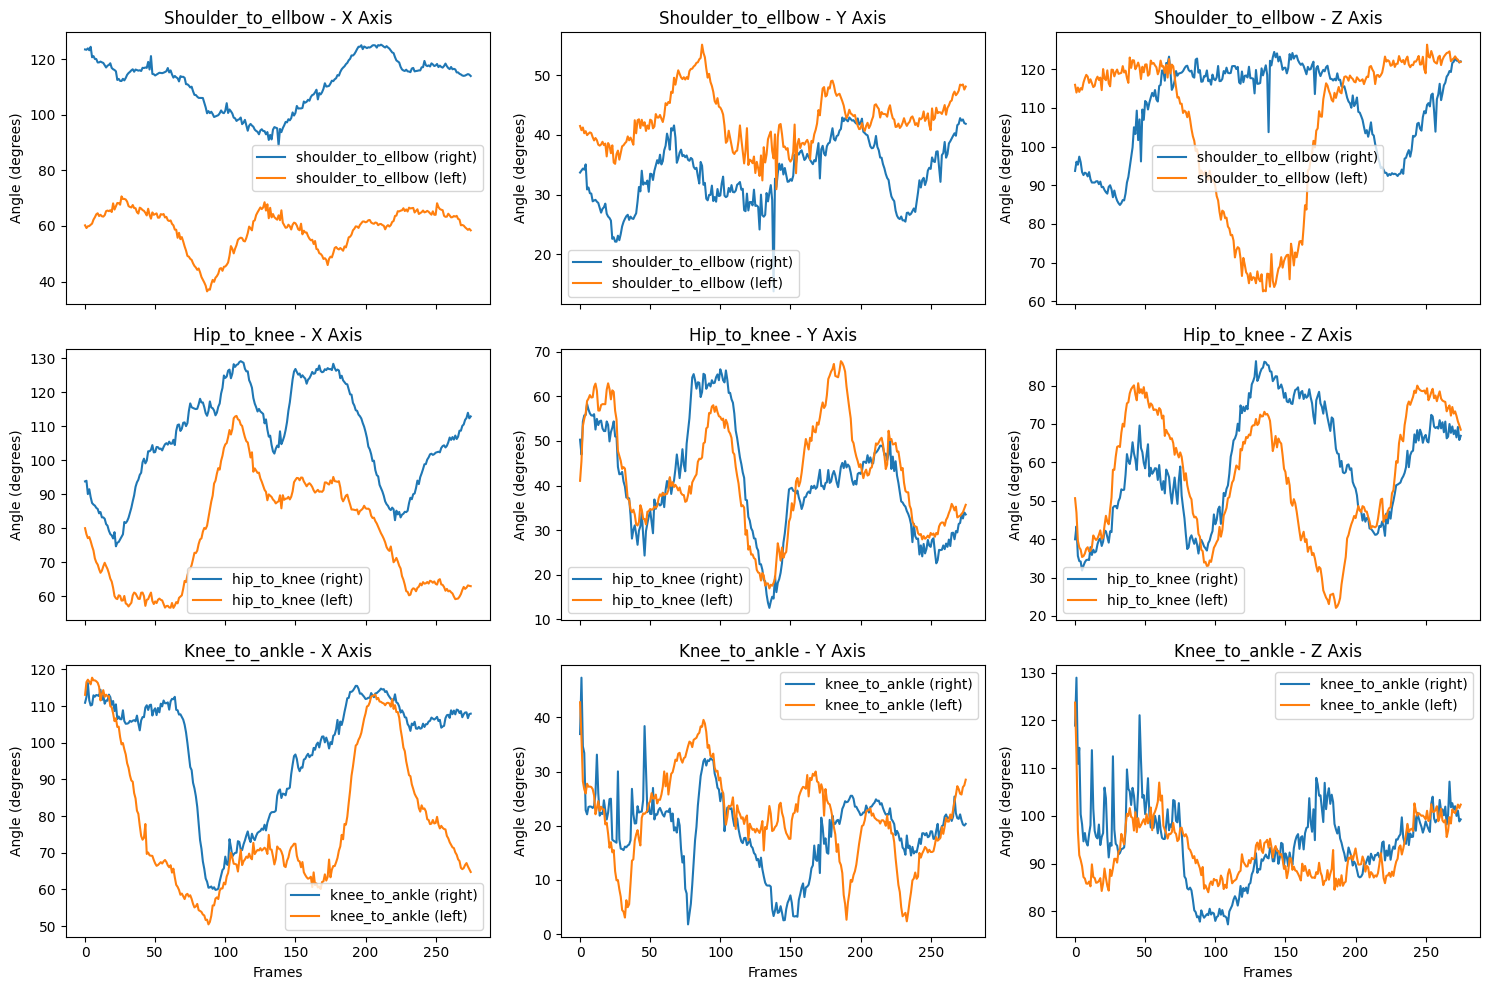

In [1278]:
# Hier werden die Winkel der Joints (z.B. Oberarm) zu den Achsen berechnet (x, y und z)

import numpy as np
import matplotlib.pyplot as plt

def calculate_joint_angles(result):
    axis_vectors = {
        "x": np.array([1, 0, 0]),
        "y": np.array([0, 1, 0]),
        "z": np.array([0, 0, -1])
    }
    joint_angles = {}

    for i, frame in enumerate(result.keys()):
        joint_angles[i] = {}

        joints = result[frame]['3d_joints'][0]
        vectors = {
            "shoulder_to_ellbow_right": joints[r_ellbow_num] - joints[r_shoulder_num],
            "shoulder_to_ellbow_left": joints[l_ellbow_num] - joints[l_shoulder_num],
            "hip_to_knee_right": joints[r_knee_num] - joints[r_hip_num],
            "hip_to_knee_left": joints[l_knee_num] - joints[l_hip_num],
            "knee_to_ankle_right": joints[r_ankle_num] - joints[r_knee_num],
            "knee_to_ankle_left": joints[l_ankle_num] - joints[l_knee_num]
        }

        for axis_name, axis_vector in axis_vectors.items():
            joint_angles[i][axis_name] = {}

            for joint_name, joint_vector in vectors.items():
                angle = np.degrees(np.arccos(
                    np.dot(joint_vector, axis_vector) / (np.linalg.norm(joint_vector) * np.linalg.norm(axis_vector))
                ))
                joint_angles[i][axis_name][f"{axis_name}_{joint_name}_axis_angle"] = angle

    return joint_angles

def plot_joint_angles(joint_angles):
    frames = list(joint_angles.keys())
    joint_names = ["shoulder_to_ellbow", "hip_to_knee", "knee_to_ankle"]
    sides = ["right", "left"]
    axis_names = ["x", "y", "z"]

    fig, axs = plt.subplots(len(joint_names), len(axis_names), figsize=(15, 10), sharex=True)

    for j, joint in enumerate(joint_names):
        for a, axis in enumerate(axis_names):
            for side in sides:
                angle_key = f"{axis}_{joint}_{side}_axis_angle"
                angles = [joint_angles[frame][axis][angle_key] for frame in frames]
                axs[j, a].plot(frames, angles, label=f"{joint} ({side})")
            axs[j, a].set_title(f"{joint.capitalize()} - {axis.upper()} Axis")
            axs[j, a].set_ylabel("Angle (degrees)")
            axs[j, a].legend()

    for ax in axs[-1, :]:
        ax.set_xlabel("Frames")

    plt.tight_layout()
    plt.show()

# Berechnung der Winkel
joint_angles = calculate_joint_angles(result)

# Beispiel-Ausgabe für Frame 0
print(joint_angles[0])

# Plotten der Winkel
plot_joint_angles(joint_angles)


    # ACHTUNG: Mögliche Achsenspiegelung!
    # Es könnte sein, dass eine Körperseite (z. B. linke Schulter) in einem negativen Bereich des Koordinatensystems liegt.
    # In diesem Fall könnten die Winkel der linken Körperseite die gespiegelte Version der rechten Körperseite sein.
    # Das sieht man besonders bei den Schulter-Ellbogen-Winkeln, die fast genau gegensätzlich verlaufen bei SimonPD.

In [1279]:
# Berechne die Winkel aller Achsen (Schulterachse, Hüftachse, Knieachse und Fußgelenksachse zu den drei Achsen des Koordinatensystems)
# r_hip_num = 9; r_knee_num = 10; r_ankle_num = 11; r_shoulder_num = 2
# l_hip_num = 12; l_knee_num = 13; l_ankle_num = 14; l_shoulder_num = 5

axis_vectors = {
    "x": np.array([1, 0, 0]),
    "y": np.array([0, 1, 0]),
    "z": np.array([0, 0, 1])
}

axis_angles = {}

def calculate_axis_angles(result):
    for i, frame in enumerate(result.keys()):
        axis_angles[i] = {}

        joints = result[frame]['3d_joints'][0]
        axes = {
            "shoulder": joints[r_shoulder_num] - joints[l_shoulder_num],
            "hip": joints[r_hip_num] - joints[l_hip_num],
            "knee": joints[r_knee_num] - joints[l_knee_num],
            "ankle": joints[r_ankle_num] - joints[l_ankle_num]
        }

        for axis_name, axis_vector in axis_vectors.items():
            axis_angles[i][axis_name] = {}

            for joint_name, joint_vector in axes.items():
                angle = np.degrees(np.arccos(np.dot(joint_vector, axis_vector) /
                                             (np.linalg.norm(joint_vector) * np.linalg.norm(axis_vector))))
                axis_angles[i][axis_name][f"{axis_name}_{joint_name}_axis_angle"] = angle

calculate_axis_angles(result)

# Beispiel-Ausgabe für Frame 0
print(axis_angles[0])





{'x': {'x_shoulder_axis_angle': np.float64(168.22521567404468), 'x_hip_axis_angle': np.float64(164.57596595321198), 'x_knee_axis_angle': np.float64(154.42955909065296), 'x_ankle_axis_angle': np.float64(149.18627138466815)}, 'y': {'y_shoulder_axis_angle': np.float64(89.94804635987259), 'y_hip_axis_angle': np.float64(96.89889601348173), 'y_knee_axis_angle': np.float64(102.94568773429438), 'y_ankle_axis_angle': np.float64(96.56347776548014)}, 'z': {'z_shoulder_axis_angle': np.float64(101.7746652074082), 'z_hip_axis_angle': np.float64(103.72667543965999), 'z_knee_axis_angle': np.float64(111.64952364976763), 'z_ankle_axis_angle': np.float64(119.95587031580078)}}


{'x': {'x_shoulder_axis_angle': np.float64(168.22521567404468), 'x_hip_axis_angle': np.float64(164.57596595321198), 'x_knee_axis_angle': np.float64(154.42955909065296), 'x_ankle_axis_angle': np.float64(149.18627138466815)}, 'y': {'y_shoulder_axis_angle': np.float64(89.94804635987259), 'y_hip_axis_angle': np.float64(96.89889601348173), 'y_knee_axis_angle': np.float64(102.94568773429438), 'y_ankle_axis_angle': np.float64(96.56347776548014)}, 'z': {'z_shoulder_axis_angle': np.float64(101.7746652074082), 'z_hip_axis_angle': np.float64(103.72667543965999), 'z_knee_axis_angle': np.float64(111.64952364976763), 'z_ankle_axis_angle': np.float64(119.95587031580078)}}


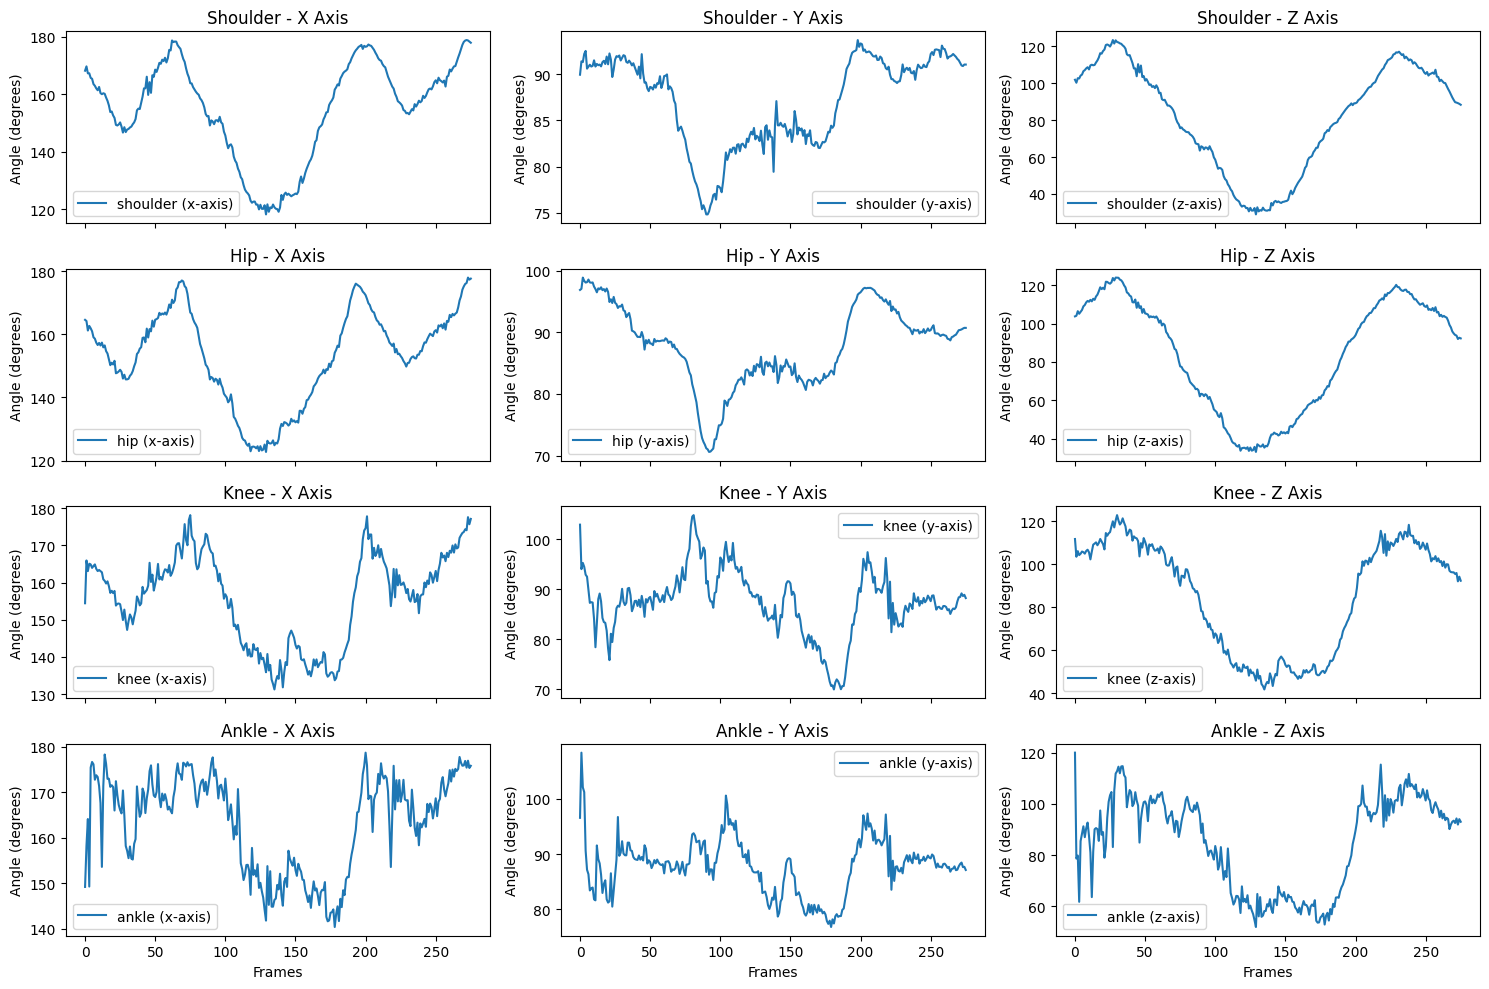

In [1280]:
import matplotlib.pyplot as plt

def calculate_axis_angles(result):
    axis_vectors = {
        "x": np.array([1, 0, 0]),
        "y": np.array([0, 1, 0]),
        "z": np.array([0, 0, 1])
    }
    axis_angles = {}

    for i, frame in enumerate(result.keys()):
        axis_angles[i] = {}

        joints = result[frame]['3d_joints'][0]
        axes = {
            "shoulder": joints[r_shoulder_num] - joints[l_shoulder_num],
            "hip": joints[r_hip_num] - joints[l_hip_num],
            "knee": joints[r_knee_num] - joints[l_knee_num],
            "ankle": joints[r_ankle_num] - joints[l_ankle_num]
        }

        for axis_name, axis_vector in axis_vectors.items():
            axis_angles[i][axis_name] = {}

            for joint_name, joint_vector in axes.items():
                angle = np.degrees(np.arccos(np.dot(joint_vector, axis_vector) /
                                             (np.linalg.norm(joint_vector) * np.linalg.norm(axis_vector))))
                axis_angles[i][axis_name][f"{axis_name}_{joint_name}_axis_angle"] = angle

    return axis_angles

def plot_axis_angles(axis_angles):
    frames = list(axis_angles.keys())
    joint_names = ["shoulder", "hip", "knee", "ankle"]
    axis_names = ["x", "y", "z"]

    fig, axs = plt.subplots(len(joint_names), len(axis_names), figsize=(15, 10), sharex=True)

    for j, joint in enumerate(joint_names):
        for a, axis in enumerate(axis_names):
            angles = [axis_angles[frame][axis][f"{axis}_{joint}_axis_angle"] for frame in frames]
            axs[j, a].plot(frames, angles, label=f"{joint} ({axis}-axis)")
            axs[j, a].set_title(f"{joint.capitalize()} - {axis.upper()} Axis")
            axs[j, a].set_ylabel("Angle (degrees)")
            axs[j, a].legend()

    for ax in axs[-1, :]:
        ax.set_xlabel("Frames")

    plt.tight_layout()
    plt.show()

# Berechnung der Winkel
axis_angles = calculate_axis_angles(result)

# Beispiel-Ausgabe für Frame 0
print(axis_angles[0])

# Plotten der Winkel
plot_axis_angles(axis_angles)


In [1281]:
x_vector = np.array([1, 0, 0])
y_vector = np.array([0, 1, 0])
z_vector = np.array([0, 0, 1])


COM_angles = {}

for i, frame in enumerate(list(result.keys())):
    COM_angle = {}

    # Berechne den Vektor vom Knöchel-Mittelpunkt zum COM
    ground_to_COM_vector = np.array(COM_xyz_values[i]) - np.array(center_ankle[i])

    # Berechne die Winkel zur x-, y- und z-Achse
    COM_x_rotation = np.degrees(np.arccos(np.dot(ground_to_COM_vector, x_vector) / (np.linalg.norm(ground_to_COM_vector) * np.linalg.norm(x_vector))))
    COM_y_rotation = np.degrees(np.arccos(np.dot(ground_to_COM_vector, y_vector) / (np.linalg.norm(ground_to_COM_vector) * np.linalg.norm(y_vector))))
    COM_z_rotation = np.degrees(np.arccos(np.dot(ground_to_COM_vector, z_vector) / (np.linalg.norm(ground_to_COM_vector) * np.linalg.norm(z_vector))))

    COM_angle["COM_x_rotation"] = COM_x_rotation
    COM_angle["COM_y_rotation"] = COM_y_rotation
    COM_angle["COM_z_rotation"] = COM_z_rotation

    COM_angles[i] = COM_angle

print(COM_angles[0])


{'COM_x_rotation': np.float64(78.7404946565745), 'COM_y_rotation': np.float64(168.72101951560273), 'COM_z_rotation': np.float64(90.6541424337592)}


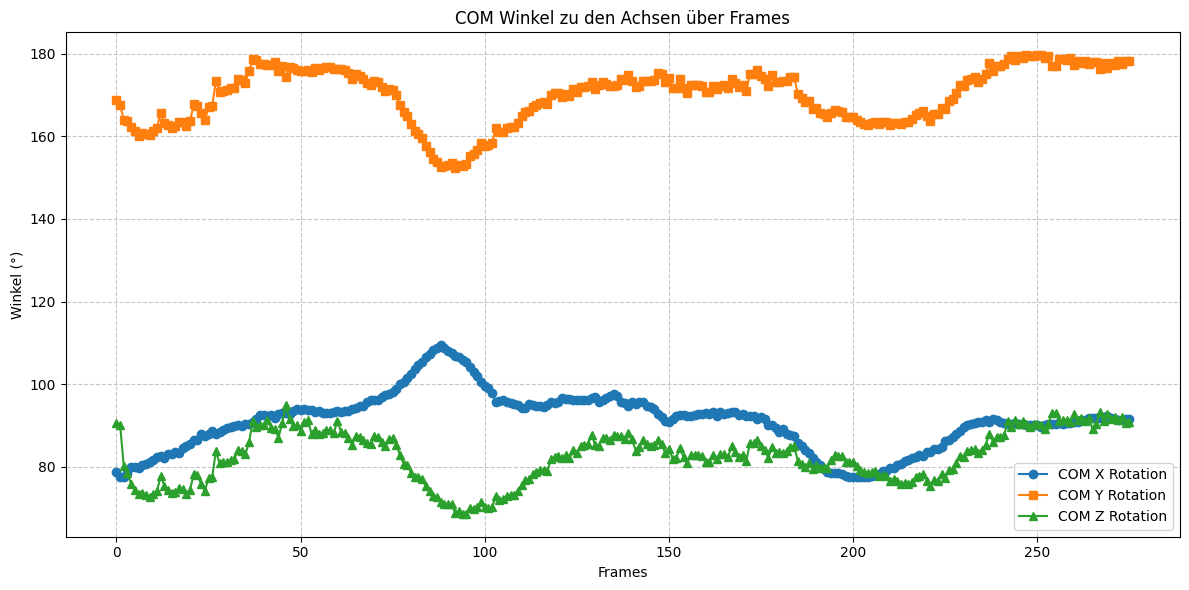

In [1282]:
import matplotlib.pyplot as plt
import numpy as np

def plot_COM_angles(COM_angles):
    """
    Plottet die COM-Winkel zur x-, y- und z-Achse über alle Frames.

    Parameter:
    - COM_angles (dict): Dictionary mit Frame-Nummern als Schlüsseln und
                         Dictionaries der Winkel als Werte.
                         Beispiel:
                         {
                             0: {"COM_x_rotation": 30.0, "COM_y_rotation": 45.0, "COM_z_rotation": 60.0},
                             1: {"COM_x_rotation": 32.0, "COM_y_rotation": 46.0, "COM_z_rotation": 61.0},
                             ...
                         }
    """
    frames = sorted(COM_angles.keys())

    # Listen der Winkelwerte
    COM_x = [COM_angles[frame].get("COM_x_rotation", np.nan) for frame in frames]
    COM_y = [COM_angles[frame].get("COM_y_rotation", np.nan) for frame in frames]
    COM_z = [COM_angles[frame].get("COM_z_rotation", np.nan) for frame in frames]

    plt.figure(figsize=(12, 6))

    # Plot für jede Achse
    plt.plot(frames, COM_x, label='COM X Rotation', marker='o')
    plt.plot(frames, COM_y, label='COM Y Rotation', marker='s')
    plt.plot(frames, COM_z, label='COM Z Rotation', marker='^')

    # Achsenbeschriftungen und Titel
    plt.xlabel('Frames')
    plt.ylabel('Winkel (°)')
    plt.title('COM Winkel zu den Achsen über Frames')

    # Legende und Gitter
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Beispielhafte Nutzung der Funktion
# Stelle sicher, dass dein 'COM_angles'-Dictionary bereits definiert und gefüllt ist
plot_COM_angles(COM_angles)


In [1283]:
# Speichern der Features in pkl file - alle Features werden in Dictionary mit jeweiligem Nanen gespeichert, so kann man später auf diese zugreifen beim Training
# Feature 1: Center of Mass Distance to Ground
print(COM_to_ground)

# Feature 2: Knee Angles Right & Left
print(knee_angles_right)
print(knee_angles_left)

# Feature 3: beinhaltet Winkel für den Oberarm (Schulter zu Ellbogen), Oberschenkel (Hüfte zu Knie) sowie Unterschenkel (Knie zu Fußgelenk) zu den drei Achsen des Koordinatensystems (x, y und z)
print(joint_angles)

# Feature 4: berechnet den Winkel der Achsen (Schulterachse, Hüftachse, Knieachse und Fußgelenksachse) zu den drei Achsen des Koordinatensystems (x, y und z)
print(axis_angles)

# Feature 5: Center of Mass Winkel zu den drei Achsen -> die Achsen sind immer ein globaler referenzvektor (1, 0, 0), (0, 1, 0), (0, 0, 1)
print(COM_angles)

{0: np.float32(0.7581649), 1: np.float32(0.75216), 2: np.float32(0.77810186), 3: np.float32(0.7764344), 4: np.float32(0.7992735), 5: np.float32(0.78916377), 6: np.float32(0.79874957), 7: np.float32(0.79617196), 8: np.float32(0.8006673), 9: np.float32(0.8025426), 10: np.float32(0.79038477), 11: np.float32(0.79299533), 12: np.float32(0.7585489), 13: np.float32(0.79520637), 14: np.float32(0.8044584), 15: np.float32(0.80390793), 16: np.float32(0.80679303), 17: np.float32(0.7992105), 18: np.float32(0.8043176), 19: np.float32(0.79716355), 20: np.float32(0.78987265), 21: np.float32(0.7836218), 22: np.float32(0.7823428), 23: np.float32(0.7932026), 24: np.float32(0.80147743), 25: np.float32(0.807606), 26: np.float32(0.81541413), 27: np.float32(0.81011474), 28: np.float32(0.8439559), 29: np.float32(0.8497753), 30: np.float32(0.85602355), 31: np.float32(0.8601885), 32: np.float32(0.86352795), 33: np.float32(0.8700836), 34: np.float32(0.88082534), 35: np.float32(0.8825121), 36: np.float32(0.885413

In [1284]:
import pickle

# Features in ein Dictionary packen
features_dict = {
    "COM_to_ground": COM_to_ground,
    "knee_angles_right": knee_angles_right,
    "knee_angles_left": knee_angles_left,
    "joint_angles": joint_angles,
    "axis_angles": axis_angles,
    "COM_angles": COM_angles
}

# Als .pkl speichern
with open("features.pkl", "wb") as pkl_file:
    pickle.dump(features_dict, pkl_file)

# Als .txt speichern (für visuelle Überprüfung)
with open("features.txt", "w") as txt_file:
    for key, value in features_dict.items():
        txt_file.write(f"{key}:\n{value}\n\n")

print("Speicherung abgeschlossen: 'features.pkl' und 'features.txt'")


Speicherung abgeschlossen: 'features.pkl' und 'features.txt'


In [1285]:
import pickle
import os

# 🔹 Sicherstellen, dass der Ordner existiert
os.makedirs("data", exist_ok=True)

# 🔹 Features laden (falls sie schon gespeichert wurden)
with open("features.pkl", "rb") as pkl_file:
    features_dict = pickle.load(pkl_file)

num_frames = len(features_dict["COM_to_ground"])
print(num_frames)

labels = {}
label_fahrstil = fahrstil

for start, end, schwungbereich in schwungbereiche:
  for i in range(start, end + 1):
    labels[i] = schwungbereich


# 🔹 Labels in Dictionary speichern
features_dict["schwung_labels"] = labels
features_dict["fahrstil"] = label_fahrstil

# 🔹 Neue Daten speichern (mit Labels)
with open(f"data/{pkl_name}_features.pkl", "wb") as pkl_file:
    pickle.dump(features_dict, pkl_file)


with open(f"{pkl_name}_features.txt", "w") as txt_file:
    for key, value in features_dict.items():
        txt_file.write(f"{key}:\n{value}\n\n")

print("Speicherung abgeschlossen")


276
Speicherung abgeschlossen
